In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

sns.set_context("talk")

colors = sns.color_palette("Paired")

In [50]:
# FLOPS preconditioning data
FLOPS_precond_H2 = np.array([
    247802382510,
    674827267014,
    1281395646300,
    2752179737664
])
FLOPS_precond_forma = np.array([
    3750518394486,
    255888432556178,
    50646514110082,
    82626310399146
])
FLOPS_precon_uracil = np.array([
    18788731019928,
    169714930218796,
    171273403890816,
    527419230709696
])


# FLOPS no preconditioning data
FLOPS_H2 = np.array([234400236504, 703770364608, 1201031042256, 1856162550682])
FLOPS_formal = np.array([4148365720086, 25426240907522, 38471656220710, 68828434376950])
FLOPS_uracil= np.array([15508435058200, 100593030078592, 187532896506336, 463388011832224])

# Exact FLOPS (for reference)
FLOPS_exact_H2 = 20*(11994)**3
FLOPS_exact_formal = 20*(27643)**3
FLOPS_exact_uracil = 20*(32416)**3

N = np.array([10, 50, 100, 200])

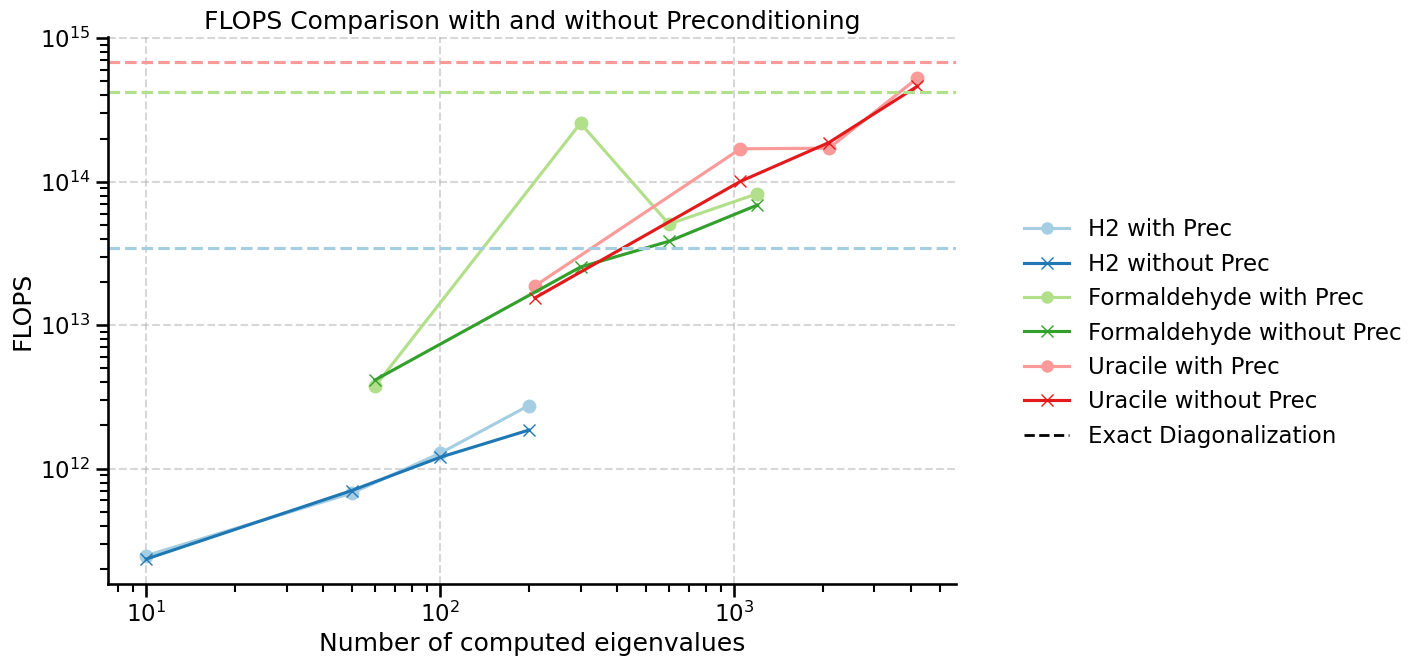

In [52]:
fig, axes = plt.subplots(figsize=(10, 7))  # slightly wider to fit legend

# With Preconditioning
axes.plot(N, FLOPS_precond_H2, 'o-', label='H2 with Preconditioning', color=colors[0])
axes.plot(N*6, FLOPS_precond_forma, 'o-', label='Forma with Preconditioning', color=colors[2])
axes.plot(N*21, FLOPS_precon_uracil, 'o-', label='Uracil with Preconditioning', color=colors[4])

# Without Preconditioning
axes.plot(N, FLOPS_H2, 'x-', label='H2 without Preconditioning', color=colors[1])
axes.plot(N*6, FLOPS_formal, 'x-', label='Forma without Preconditioning', color=colors[3])
axes.plot(N*21, FLOPS_uracil, 'x-', label='Uracil without Preconditioning', color=colors[5])

# exact diagonalization lines
axes.axhline(FLOPS_exact_H2, color=colors[0], ls='--', label='Exact H2')
axes.axhline(FLOPS_exact_formal, color=colors[2], ls='--', label='Exact Formaldehyde')
axes.axhline(FLOPS_exact_uracil, color=colors[4], ls='--', label='Exact Uracil')


# Scales and labels
axes.set_xscale("log")
axes.set_yscale("log")
sns.despine()
axes.set_xlabel("Number of computed eigenvalues")
axes.set_ylabel("FLOPS")
axes.set_title("FLOPS Comparison with and without Preconditioning")

# --- Legend ---
legend_elements = [
    Line2D([0], [0], marker='o', color=colors[0], label='H2 with Prec', markersize=8, linestyle='-'),
    Line2D([0], [0], marker='x', color=colors[1], label='H2 without Prec', markersize=8, linestyle='-'),
    Line2D([0], [0], marker='o', color=colors[2], label='Formaldehyde with Prec', markersize=8, linestyle='-'),
    Line2D([0], [0], marker='x', color=colors[3], label='Formaldehyde without Prec', markersize=8, linestyle='-'),
    Line2D([0], [0], marker='o', color=colors[4], label='Uracile with Prec', markersize=8, linestyle='-'),
    Line2D([0], [0], marker='x', color=colors[5], label='Uracile without Prec', markersize=8, linestyle='-'),
    Line2D([0], [0], color='black', lw=2, ls='--', label='Exact Diagonalization')
]

# Put legend OUTSIDE the plot on the right
fig.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)

# Adjust layout to make room for legend
plt.subplots_adjust(right=0.75)  # creates extra space on the right
plt.grid(True, ls="--", alpha=0.5)
plt.tight_layout()
plt.savefig("FLOPs_comparison_preconditioning.pdf", bbox_inches='tight')
plt.show()
